https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dataset = pd.read_csv('sample/Mall_Customers.csv')

In [3]:
dataset.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Let's rename some columns

dataset.rename(index = str, columns = {'Annual Income (k$)' : 'income', 'Spending Score (1-100)': 'score', 'Age' : 'age'}, inplace = True
              )

In [6]:
dataset.columns

Index(['CustomerID', 'Gender', 'age', 'income', 'score'], dtype='object')

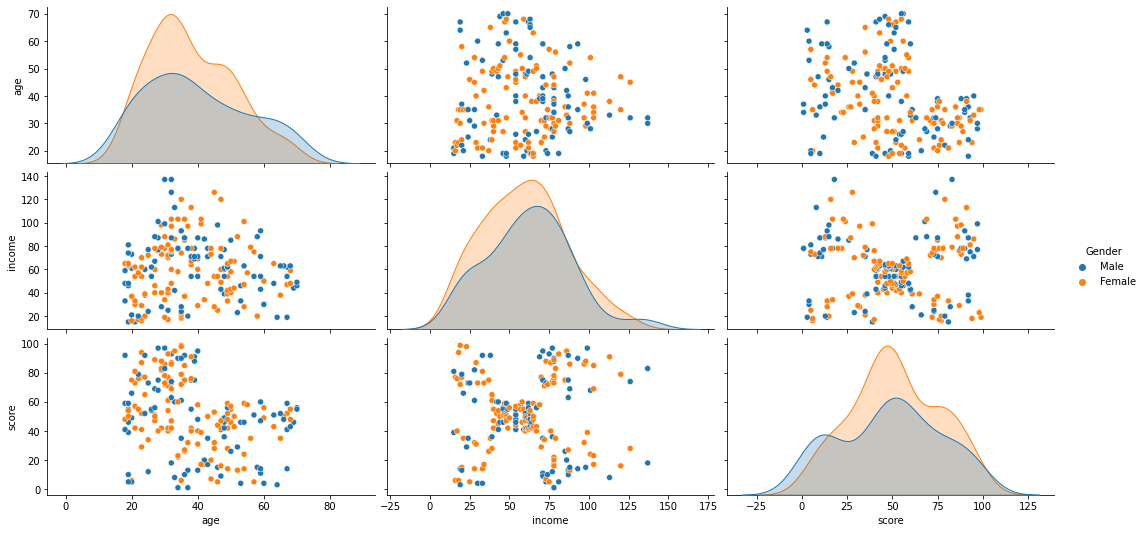

In [10]:
# Pairplot with Gender based spending

x = dataset.drop(['CustomerID','Gender'], axis = 1)
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', data = dataset, aspect = 2.0)
plt.show()

In [11]:
# K-Means

from sklearn.cluster import KMeans
clusters = []

for i in range(1,11):
    km = KMeans(n_clusters = i).fit(x)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

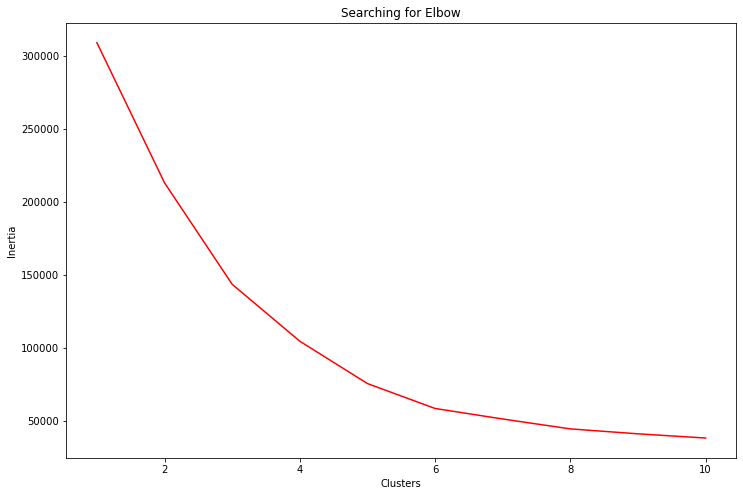

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax, color = 'red')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

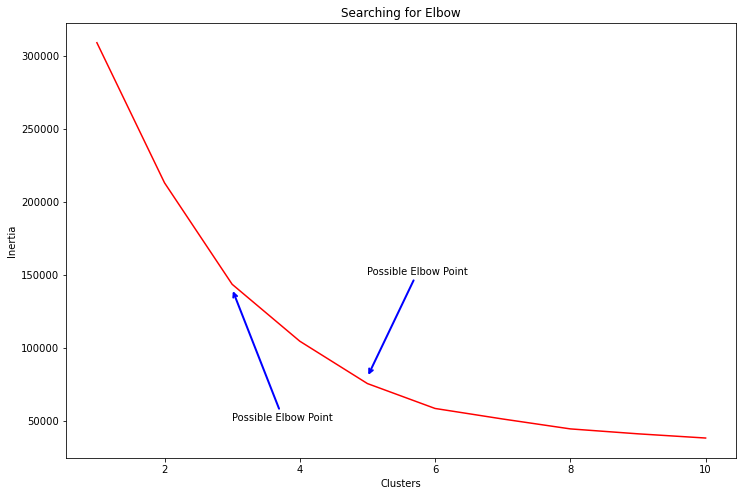

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax, color = 'red')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


C:\Anaconda_Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda_Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


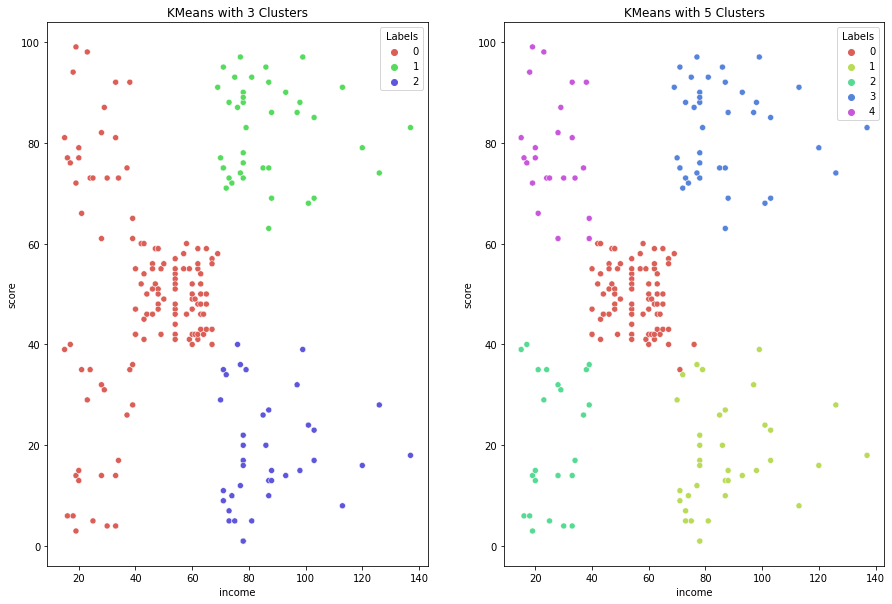

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
km3 = KMeans(n_clusters = 3).fit(x)
x['Labels'] = km3.labels_
sns.scatterplot(x['income'], x['score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')


plt.subplot(1,2,2)
km5 = KMeans(n_clusters = 5).fit(x)
x['Labels'] = km5.labels_
sns.scatterplot(x['income'], x['score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')

plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

    Label 0 is low income and low spending
    Label 1 is high income and high spending
    Label 2 is mid income and mid spending
    Label 3 is high income and low spending
    Label 4 is low income and high spending
    
Also let's see them more clearly with swarmplot:

No handles with labels found to put in legend.


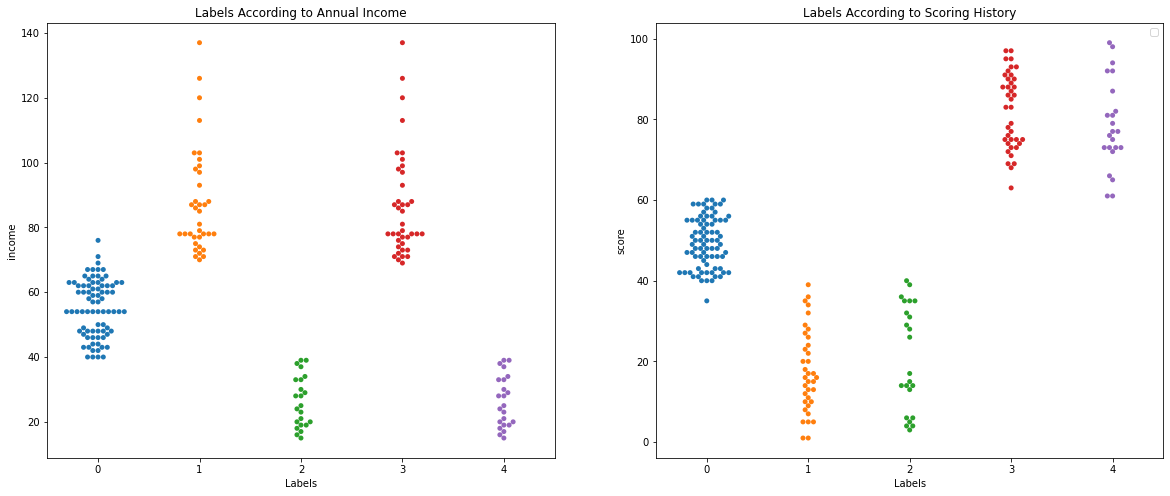

In [32]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='income', data=x, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='score', data=x, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

In [ ]:
# Hierarchial clustering - Agglomerative

In [34]:
from sklearn.cluster import AgglomerativeClustering as AGS
agglom = AGS(n_clusters = 5, linkage = 'average').fit(x)

C:\Anaconda_Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


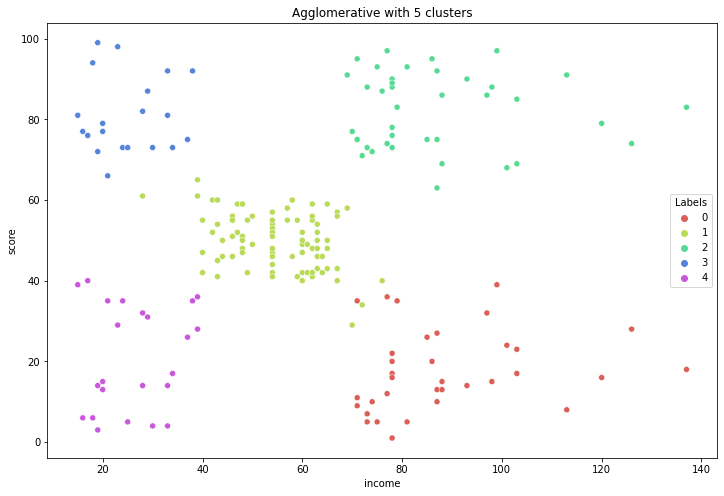

In [36]:
x['Labels'] = agglom.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x['income'], x['score'], hue=x['Labels'], palette = sns.color_palette('hls',5))
plt.title('Agglomerative with 5 clusters')
plt.show()

Dendrogram Associated for the Agglomerative Hierarchical Clustering

Remember that a distance matrix contains the distance from each point to every other point of a dataset .
We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.



In [37]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(x,x)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [44]:
z1 = hierarchy.linkage(dist,'complete')

<ipython-input-44-1cdc2f63876e>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z1 = hierarchy.linkage(dist,'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

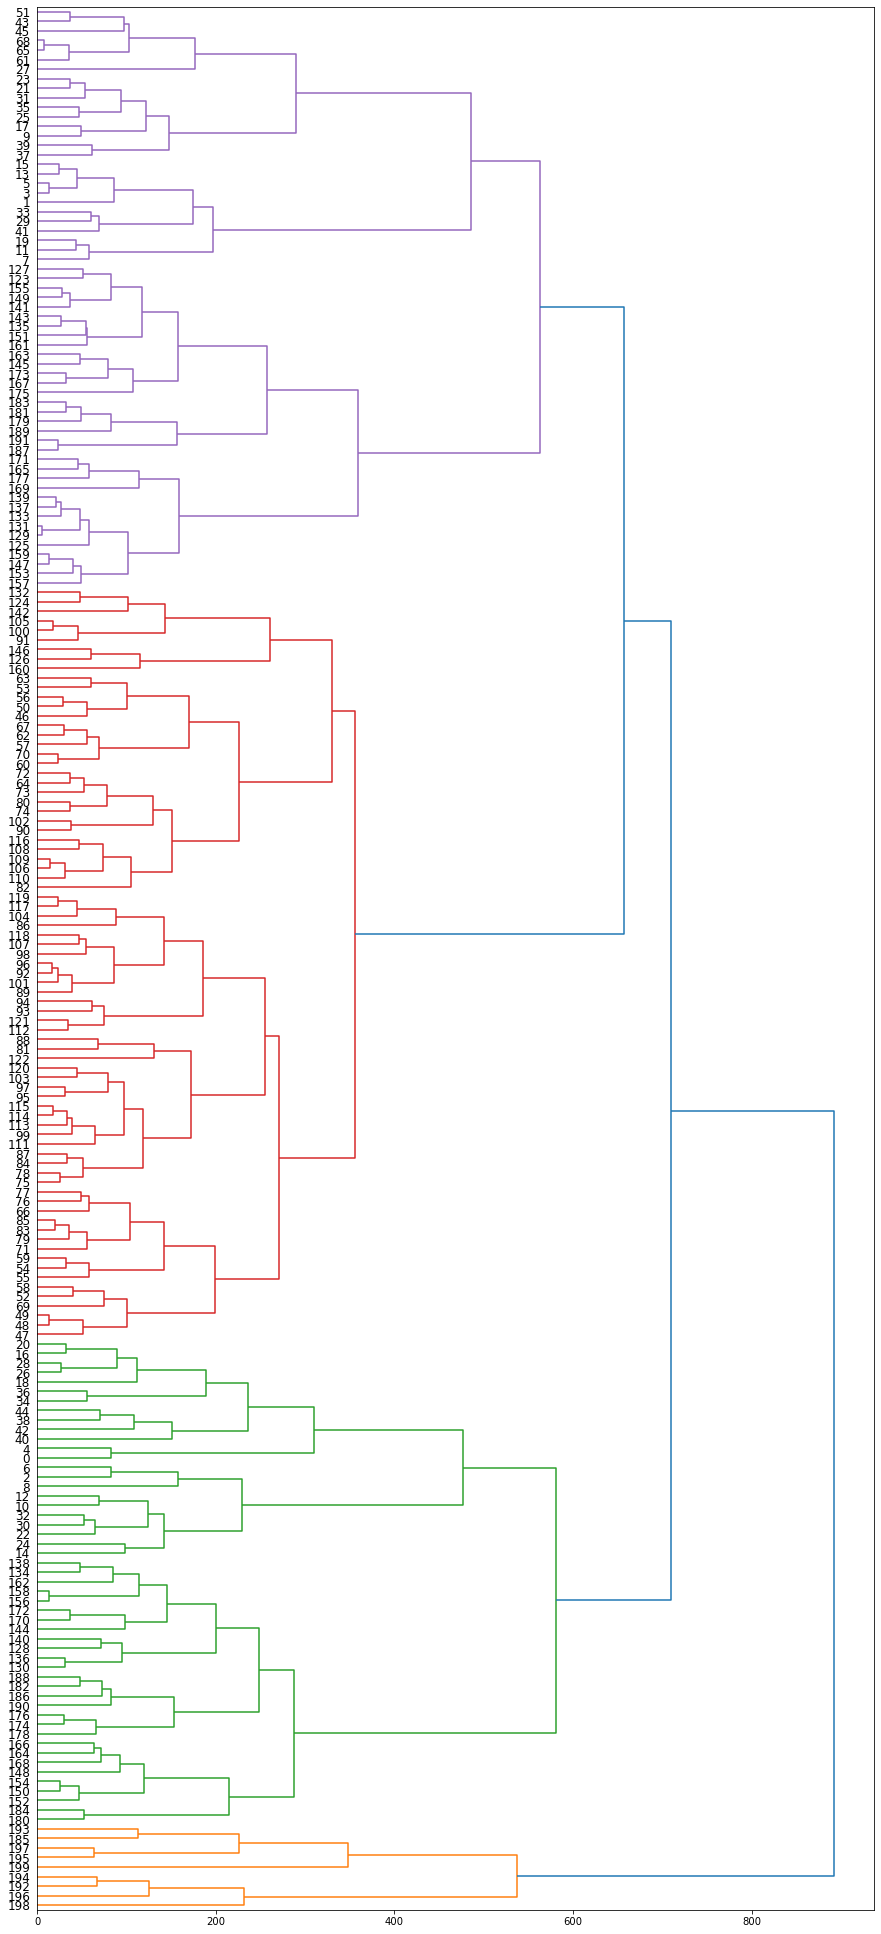

In [45]:
plt.figure(figsize = (15,35))

dendo1 = hierarchy.dendrogram(z1, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

plt.show()

<ipython-input-49-5e3926ebc51c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z2 = hierarchy.linkage(dist, 'average')


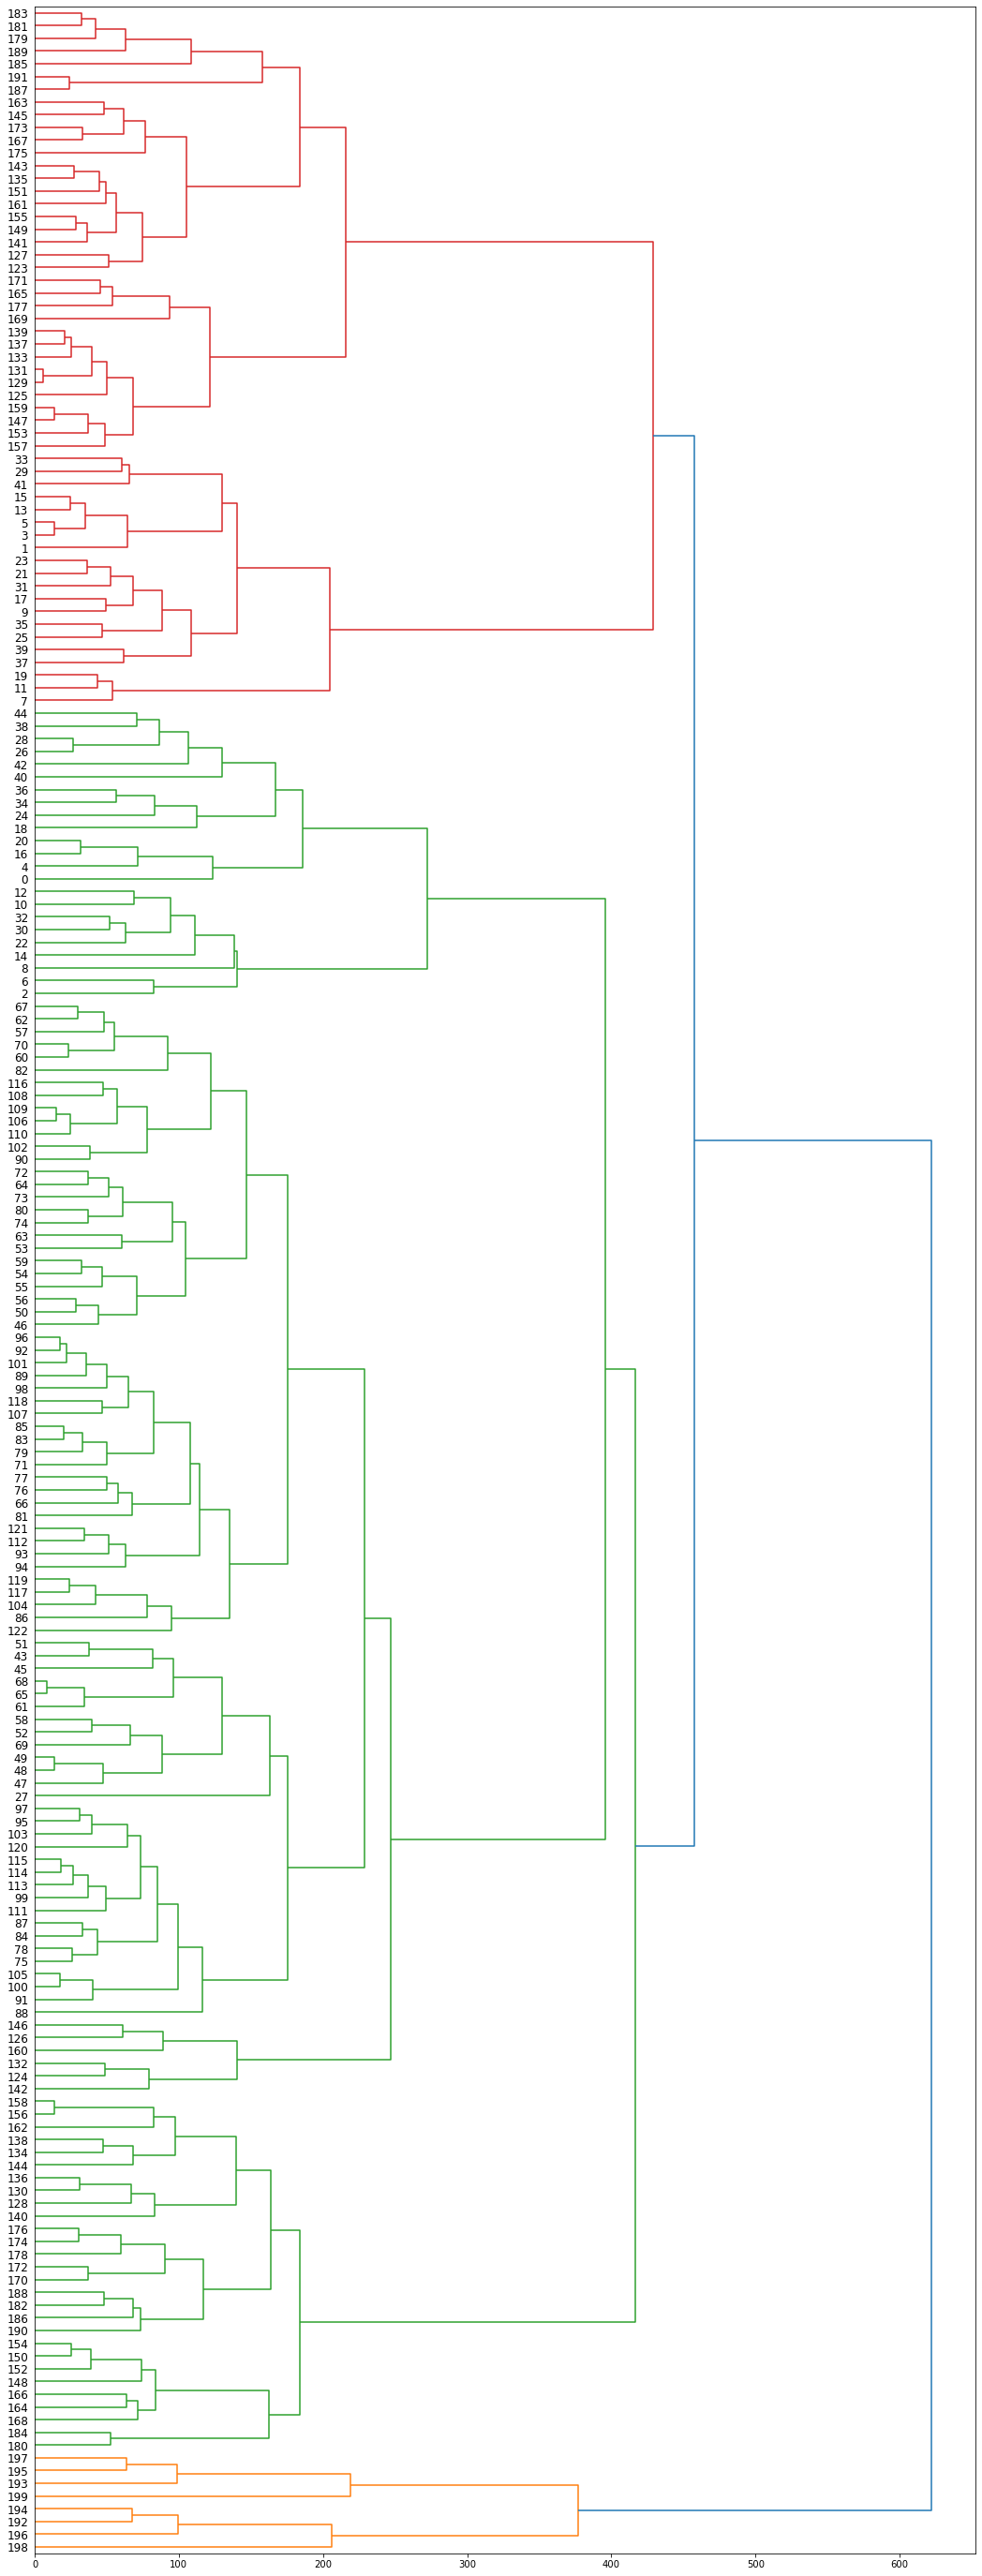

In [49]:
z2 = hierarchy.linkage(dist, 'average')
plt.figure(figsize = (18,50))

dendo2 = hierarchy.dendrogram(z2, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

plt.show()

# DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 11, min_samples = 6).fit(x)

C:\Anaconda_Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


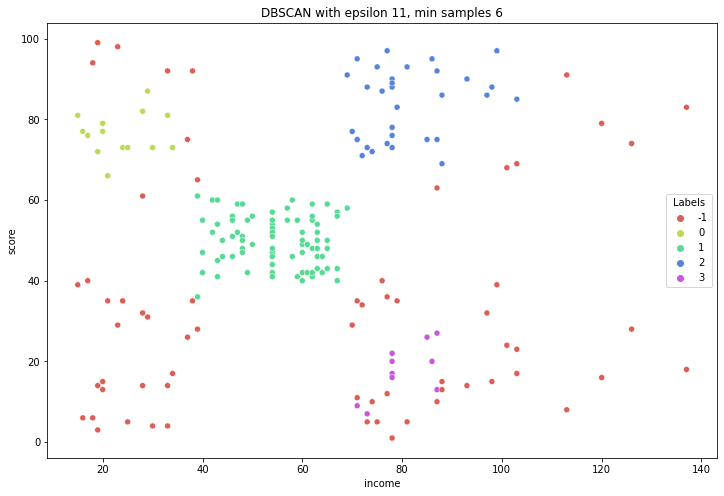

In [51]:
x['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x['income'], x['score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.

In [ ]:
Code Practised from - https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms 